# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [13]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

  
print male_df.Height.mean()
print male_df.Height.std()
print male_df.Height.describe()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621741
2.863362228660647
count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

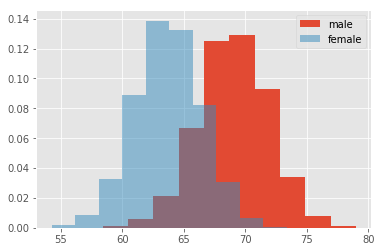

In [24]:


plt.hist(male_df.Height, 10, normed = True, alpha=1, label='male')
plt.hist(female_df.Height, 10, normed = True, alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()

/Users/dpham/Desktop/env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


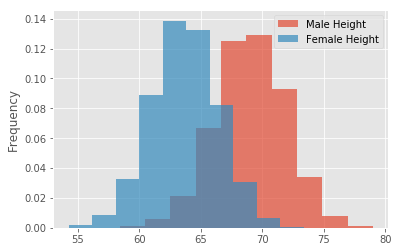

In [23]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?
# Just about as I expected


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

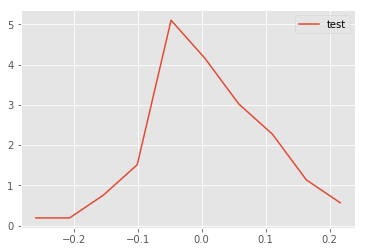

In [25]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

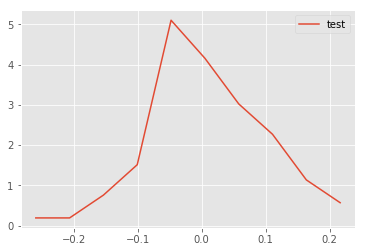

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [ ]:
# You code here 

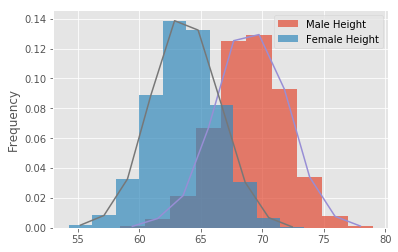

In [26]:
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exerice for male and female weights

In [ ]:
# Your code here 

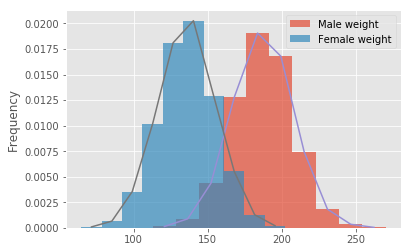

In [27]:
male_df.Weight.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male weight");
female_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

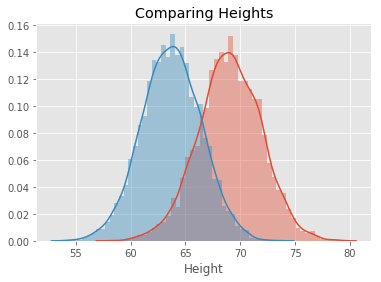

In [28]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

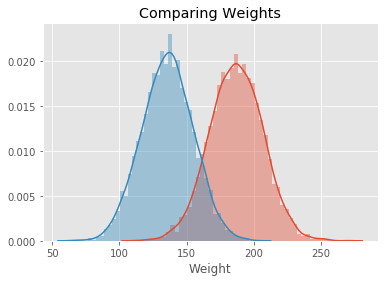

In [29]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.